<a href="https://colab.research.google.com/github/mohamedalaaaz/testpytroch/blob/main/space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np

# Constants
MU0 = 4 * np.pi * 1e-7        # Magnetic permeability (H/m)
RE = 6.371e6                  # Earth radius (m)

# Example solar wind parameters (can be time series in real studies)
solar_wind_speed = 450e3      # m/s
solar_wind_density = 5.0      # particles/cm^3
IMF_Bz = -5e-9                # Tesla (southward)

# Convert density to SI (kg/m^3)
m_p = 1.6726e-27              # Proton mass (kg)
solar_wind_density_si = solar_wind_density * 1e6 * m_p  # kg/m^3

# Dynamic pressure: P = rho * V^2
P_dyn = solar_wind_density_si * solar_wind_speed**2

# Magnetopause stand-off distance (empirical scaling)
R_mp = RE * ( ( (2 * MU0 * (7.64e22)**2 ) / (P_dyn * 1e-7) )**(1/6) )

# Reconnection electric field proxy: E = -V * Bz
E_rec = solar_wind_speed * abs(IMF_Bz)

print("Solar wind density (kg/m^3):", solar_wind_density_si)
print("Dynamic pressure (nPa):", P_dyn * 1e9)
print("Magnetopause standoff distance (Re):", R_mp / RE)
print("Reconnection electric field (mV/m):", E_rec * 1e3)


Solar wind density (kg/m^3): 8.363e-21
Dynamic pressure (nPa): 1.6935075000000002
Magnetopause standoff distance (Re): 2103487370.1462693
Reconnection electric field (mV/m): 2.2500000000000004


In [2]:


import numpy as np

# Constants
MU0 = 4 * np.pi * 1e-7        # Magnetic permeability (H/m)
RE = 6.371e6                  # Earth radius (m)
m_p = 1.6726e-27              # Proton mass (kg)

# Example solar wind parameters (can be time series in real studies)
solar_wind_speed = 450e3      # m/s
solar_wind_density = 5.0      # particles/cm^3
IMF_Bz = -5e-9                # Tesla (southward)
IMF_By = 2e-9                 # Tesla (east-west)

# Convert density to SI (kg/m^3)
solar_wind_density_si = solar_wind_density * 1e6 * m_p  # kg/m^3

# Dynamic pressure: P = rho * V^2
P_dyn = solar_wind_density_si * solar_wind_speed**2

# Magnetopause stand-off distance (empirical scaling)
R_mp = RE * ( ( (2 * MU0 * (7.64e22)**2 ) / (P_dyn * 1e-7) )**(1/6) )

# Reconnection electric field proxy: E = -V * sqrt(By^2 + Bz^2)
E_rec = solar_wind_speed * np.sqrt(IMF_By**2 + IMF_Bz**2)

# Empirical geomagnetic indices (simplified proxies)
# Burton et al. formula for Dst index (very simplified)
Dst = -0.01 * (E_rec * 1e3) * (solar_wind_density / 5.0)

# Kp proxy scaling with electric field strength
Kp = min(9, max(0, 0.15 * (E_rec * 1e3)))

print("Solar wind density (kg/m^3):", solar_wind_density_si)
print("Dynamic pressure (nPa):", P_dyn * 1e9)
print("Magnetopause standoff distance (Re):", R_mp / RE)
print("Reconnection electric field (mV/m):", E_rec * 1e3)
print("Estimated Dst index (nT):", Dst)
print("Estimated Kp index:", Kp)


Solar wind density (kg/m^3): 8.363e-21
Dynamic pressure (nPa): 1.6935075000000002
Magnetopause standoff distance (Re): 2103487370.1462693
Reconnection electric field (mV/m): 2.423324163210527
Estimated Dst index (nT): -0.02423324163210527
Estimated Kp index: 0.36349862448157905


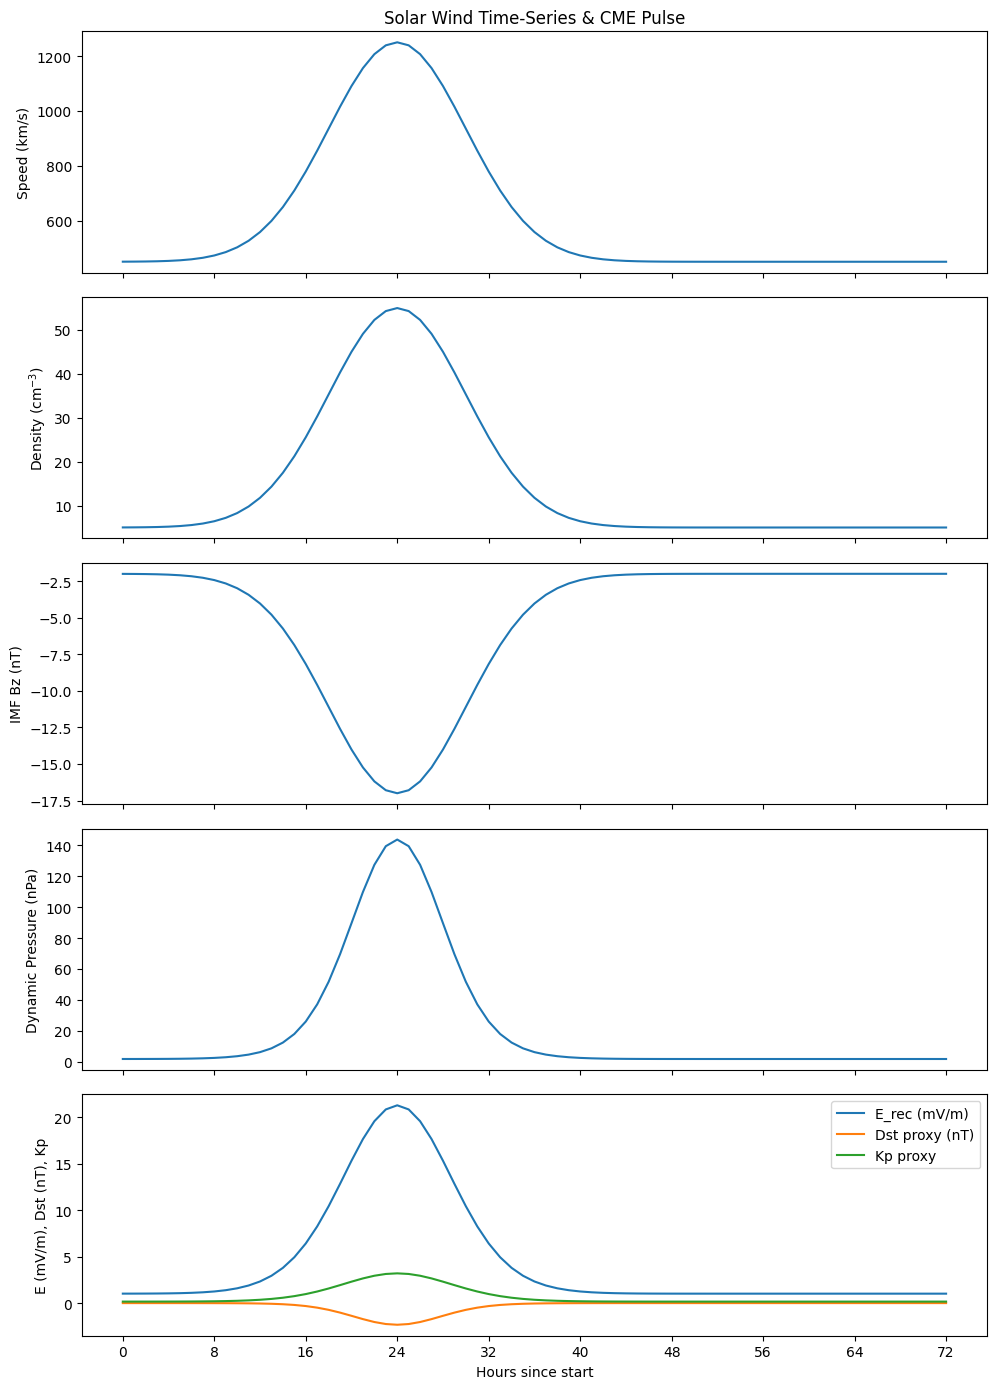


Peak dynamic pressure at t = 24.0 hours
Peak P_dyn (nPa) = 143.7390625
Peak E_rec (mV/m) = 21.286732957408002
Peak Dst proxy (nT) = -2.3415406253148805
Peak Kp proxy = 3.1930099436112003


In [3]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# --------------------------- Constants ---------------------------
MU0 = 4 * np.pi * 1e-7        # Magnetic permeability (H/m)
RE = 6.371e6                  # Earth radius (m)
m_p = 1.6726e-27              # Proton mass (kg)

# ------------------------- Simulation grid -----------------------
hours = 72                    # simulate 72 hours
dt = 1.0                      # hourly cadence (hours)
t = np.arange(0, hours + dt, dt)   # hours

# --------------------- Background SW parameters ------------------
v_bg = 450e3                  # background speed (m/s)
n_bg = 5.0                    # background density (particles/cm^3)
Bz_bg = -2e-9                 # background IMF Bz (T)
By_bg = 1e-9                  # background IMF By (T)

# -------------------- Injected CME-like pulse --------------------
# Gaussian pulse in speed, density, and southward Bz
pulse_center = 24.0           # hours
pulse_width = 6.0             # hours (sigma)
pulse_amp_v = 800e3           # extra speed (m/s)
pulse_amp_n = 50.0           # extra density (particles/cm^3)
pulse_amp_Bz = -15e-9        # additional southward Bz (T)

# Build time-varying profiles
gauss = lambda tt: np.exp(-0.5 * ((tt - pulse_center) / pulse_width)**2)

v_t = v_bg + pulse_amp_v * gauss(t)
n_t = n_bg + pulse_amp_n * gauss(t)
Bz_t = Bz_bg + pulse_amp_Bz * gauss(t)
By_t = By_bg * np.ones_like(t)

# Convert densities to kg/m^3
n_si_t = n_t * 1e6 * m_p

# ------------------- Derived physical quantities -----------------
# Dynamic pressure: P_dyn = rho * V^2  (Pa)
P_dyn_t = n_si_t * v_t**2

# Reconnection electric field proxy: E_rec = V * sqrt(By^2 + Bz^2)
E_rec_t = v_t * np.sqrt(By_t**2 + Bz_t**2)

# Simple Dst proxy (linearized, not research-grade)
Dst_t = -0.01 * (E_rec_t * 1e3) * (n_t / n_bg)

# Kp proxy scaled and clipped [0,9]
Kp_t = 0.15 * (E_rec_t * 1e3)
Kp_t = np.clip(Kp_t, 0.0, 9.0)

# ----------------------------- Plots -----------------------------
plt.rcParams.update({'figure.max_open_warning': 0})
fig, axes = plt.subplots(5, 1, figsize=(10, 14), sharex=True)

# Speed
axes[0].plot(t, v_t / 1e3)
axes[0].set_ylabel('Speed (km/s)')
axes[0].set_title('Solar Wind Time-Series & CME Pulse')
axes[0].xaxis.set_major_locator(MaxNLocator(integer=True))

# Density
axes[1].plot(t, n_t)
axes[1].set_ylabel('Density (cm$^{-3}$)')

# IMF Bz
axes[2].plot(t, Bz_t * 1e9)
axes[2].set_ylabel('IMF Bz (nT)')

# Dynamic pressure
axes[3].plot(t, P_dyn_t * 1e9)
axes[3].set_ylabel('Dynamic Pressure (nPa)')

# Electric field, Dst, Kp on same panel (scaled)
axes[4].plot(t, E_rec_t * 1e3, label='E_rec (mV/m)')
axes[4].plot(t, Dst_t, label='Dst proxy (nT)')
axes[4].plot(t, Kp_t, label='Kp proxy')
axes[4].set_ylabel('E (mV/m), Dst (nT), Kp')
axes[4].legend()

plt.xlabel('Hours since start')
plt.tight_layout()
plt.show()

# -------------------------- Summary printout ----------------------
peak_idx = np.argmax(P_dyn_t)
print('\nPeak dynamic pressure at t =', t[peak_idx], 'hours')
print('Peak P_dyn (nPa) =', P_dyn_t[peak_idx] * 1e9)
print('Peak E_rec (mV/m) =', E_rec_t[peak_idx] * 1e3)
print('Peak Dst proxy (nT) =', Dst_t[peak_idx])
print('Peak Kp proxy =', Kp_t[peak_idx])



In [4]:

import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --------------------------- Constants ---------------------------
MU0 = 4 * np.pi * 1e-7        # Magnetic permeability (H/m)
RE = 6.371e6                  # Earth radius (m)
m_p = 1.6726e-27              # Proton mass (kg)

# ------------------------- Simulation grid -----------------------
hours = 72                    # simulate 72 hours
dt_hr = 1.0                    # hourly cadence (hours)
dt = dt_hr * 3600.0           # seconds
t = np.arange(0, hours + dt_hr, dt_hr)   # hours

# ------------------- Nominal / background parameters -------------
v_bg = 450e3                  # background speed (m/s)
n_bg = 5.0                    # background density (particles/cm^3)
Bz_bg = -2e-9                 # background IMF Bz (T)
By_bg = 1e-9                  # background IMF By (T)

# -------------------- Nominal CME pulse parameters ----------------
pulse_center = 24.0           # hours
pulse_width = 6.0             # hours (sigma)
pulse_amp_v_nom = 800e3       # extra speed (m/s)
pulse_amp_n_nom = 50.0        # extra density (particles/cm^3)
pulse_amp_Bz_nom = -15e-9     # additional southward Bz (T)


N_mc = 300
rng = np.random.default_rng(42)

v_sigma = 0.2 * pulse_amp_v_nom     # 20% sigma
n_sigma = 0.3 * pulse_amp_n_nom     # 30% sigma
Bz_sigma = 0.3 * abs(pulse_amp_Bz_nom)

A_over_m_sc = 0.02   # m^2/kg (example spacecraft)
C_d = 2.0            # effective drag coefficient

def gauss_profile(tt, center=pulse_center, width=pulse_width):
    return np.exp(-0.5 * ((tt - center) / width)**2)

P_dyn_mc = np.zeros((N_mc, t.size))
E_rec_mc = np.zeros((N_mc, t.size))
delta_v_mc = np.zeros(N_mc)

for i in range(N_mc):
    amp_v = rng.normal(pulse_amp_v_nom, v_sigma)
    amp_n = rng.normal(pulse_amp_n_nom, n_sigma)
    amp_Bz = rng.normal(pulse_amp_Bz_nom, Bz_sigma)

    amp_v = max(0.0, amp_v)
    amp_n = max(0.0, amp_n)

    v_t = v_bg + amp_v * gauss_profile(t)
    n_t = n_bg + amp_n * gauss_profile(t)
    Bz_t = Bz_bg + amp_Bz * gauss_profile(t)
    By_t = By_bg * np.ones_like(t)

    n_si_t = n_t * 1e6 * m_p
    P_dyn_t = n_si_t * v_t**2   # Pa
    E_rec_t = v_t * np.sqrt(By_t**2 + Bz_t**2)

    P_dyn_mc[i, :] = P_dyn_t
    E_rec_mc[i, :] = E_rec_t

    a_drag_t = C_d * A_over_m_sc * P_dyn_t
    delta_v = np.trapz(a_drag_t, dx=dt)
    delta_v_mc[i] = delta_v

P_dyn_med = np.median(P_dyn_mc, axis=0)
P_dyn_p10 = np.percentile(P_dyn_mc, 10, axis=0)
P_dyn_p90 = np.percentile(P_dyn_mc, 90, axis=0)

E_rec_med = np.median(E_rec_mc, axis=0)
E_rec_p10 = np.percentile(E_rec_mc, 10, axis=0)
E_rec_p90 = np.percentile(E_rec_mc, 90, axis=0)


fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.05,
                    subplot_titles=("Dynamic Pressure (nPa)", "E_rec (mV/m)",
                                    "Speed (km/s)", "Density (cm^-3)"))

# Dynamic pressure
fig.add_trace(go.Scatter(x=t, y=P_dyn_med*1e9, mode='lines', name='Median P_dyn'), row=1, col=1)
fig.add_trace(go.Scatter(x=t, y=P_dyn_p10*1e9, mode='lines', line=dict(width=0), showlegend=False), row=1, col=1)
fig.add_trace(go.Scatter(x=t, y=P_dyn_p90*1e9, mode='lines', line=dict(width=0),
                         fill='tonexty', name='10-90% range'), row=1, col=1)

# E_rec
fig.add_trace(go.Scatter(x=t, y=E_rec_med*1e3, mode='lines', name='Median E_rec'), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=E_rec_p10*1e3, mode='lines', line=dict(width=0), showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=E_rec_p90*1e3, mode='lines', line=dict(width=0),
                         fill='tonexty', name='10-90% range'), row=2, col=1)

# Nominal profiles
v_nom = v_bg + pulse_amp_v_nom * gauss_profile(t)
n_nom = n_bg + pulse_amp_n_nom * gauss_profile(t)
fig.add_trace(go.Scatter(x=t, y=v_nom/1e3, mode='lines', name='Speed (km/s)'), row=3, col=1)
fig.add_trace(go.Scatter(x=t, y=n_nom, mode='lines', name='Density (cm^-3)'), row=4, col=1)

fig.update_xaxes(title_text="Hours since start", row=4, col=1)
fig.update_layout(height=900, width=900, title_text="Solar Wind Monte Carlo Simulation")
fig.show()

# ------------------------ Delta-V Histogram ----------------------
hist_fig = go.Figure()
hist_fig.add_trace(go.Histogram(x=delta_v_mc*1e3, nbinsx=30))
hist_fig.update_layout(title="Spacecraft Delta-V (plasma drag, Monte Carlo)",
                      xaxis_title="Delta-V (mm/s)",
                      yaxis_title="Counts",
                      bargap=0.1)
hist_fig.show()


print("Delta-V (m/s) median =", np.median(delta_v_mc))
print("Delta-V (m/s) 10th-90th =", np.percentile(delta_v_mc, 10), "-", np.percentile(delta_v_mc, 90))


/tmp/ipython-input-1857280069.py:82: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  delta_v = np.trapz(a_drag_t, dx=dt)


Delta-V (m/s) median = 0.0002244369913511143
Delta-V (m/s) 10th-90th = 0.0001372200514359343 - 0.00033627726204523106


In [5]:


import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import torch
import torch.nn as nn
import torch.optim as optim

# --------------------------- Constants ---------------------------
MU0 = 4 * np.pi * 1e-7        # Magnetic permeability (H/m)
RE = 6.371e6                  # Earth radius (m)
m_p = 1.6726e-27              # Proton mass (kg)

# ------------------------- Simulation grid -----------------------
hours = 72                    # simulate 72 hours
dt_hr = 1.0                    # hourly cadence (hours)
dt = dt_hr * 3600.0           # seconds
t = np.arange(0, hours + dt_hr, dt_hr)   # hours

# ------------------- Nominal / background parameters -------------
v_bg = 450e3                  # background speed (m/s)
n_bg = 5.0                    # background density (particles/cm^3)
Bz_bg = -2e-9                 # background IMF Bz (T)
By_bg = 1e-9                  # background IMF By (T)

# -------------------- Nominal CME pulse parameters ----------------
pulse_center = 24.0           # hours
pulse_width = 6.0             # hours (sigma)
pulse_amp_v_nom = 800e3       # extra speed (m/s)
pulse_amp_n_nom = 50.0        # extra density (particles/cm^3)
pulse_amp_Bz_nom = -15e-9     # additional southward Bz (T)

# -------------------------- Monte Carlo --------------------------
N_mc = 300
rng = np.random.default_rng(42)

v_sigma = 0.2 * pulse_amp_v_nom     # 20% sigma
n_sigma = 0.3 * pulse_amp_n_nom     # 30% sigma
Bz_sigma = 0.3 * abs(pulse_amp_Bz_nom)

A_over_m_sc = 0.02   # m^2/kg (example spacecraft)
C_d = 2.0            # effective drag coefficient

def gauss_profile(tt, center=pulse_center, width=pulse_width):
    return np.exp(-0.5 * ((tt - center) / width)**2)

P_dyn_mc = np.zeros((N_mc, t.size))
E_rec_mc = np.zeros((N_mc, t.size))
delta_v_mc = np.zeros(N_mc)
inputs = []
outputs = []

for i in range(N_mc):
    amp_v = rng.normal(pulse_amp_v_nom, v_sigma)
    amp_n = rng.normal(pulse_amp_n_nom, n_sigma)
    amp_Bz = rng.normal(pulse_amp_Bz_nom, Bz_sigma)

    amp_v = max(0.0, amp_v)
    amp_n = max(0.0, amp_n)

    v_t = v_bg + amp_v * gauss_profile(t)
    n_t = n_bg + amp_n * gauss_profile(t)
    Bz_t = Bz_bg + amp_Bz * gauss_profile(t)
    By_t = By_bg * np.ones_like(t)

    n_si_t = n_t * 1e6 * m_p
    P_dyn_t = n_si_t * v_t**2   # Pa
    E_rec_t = v_t * np.sqrt(By_t**2 + Bz_t**2)

    P_dyn_mc[i, :] = P_dyn_t
    E_rec_mc[i, :] = E_rec_t

    a_drag_t = C_d * A_over_m_sc * P_dyn_t
    delta_v = np.trapz(a_drag_t, dx=dt)
    delta_v_mc[i] = delta_v

    # Store input-output pairs for PyTorch model
    inputs.append([amp_v, amp_n, amp_Bz])
    outputs.append(delta_v)

P_dyn_med = np.median(P_dyn_mc, axis=0)
P_dyn_p10 = np.percentile(P_dyn_mc, 10, axis=0)
P_dyn_p90 = np.percentile(P_dyn_mc, 90, axis=0)

E_rec_med = np.median(E_rec_mc, axis=0)
E_rec_p10 = np.percentile(E_rec_mc, 10, axis=0)
E_rec_p90 = np.percentile(E_rec_mc, 90, axis=0)

# ----------------------------- Plotly Interactive Plots -----------------------------
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, vertical_spacing=0.05,
                    subplot_titles=("Dynamic Pressure (nPa)", "E_rec (mV/m)",
                                    "Speed (km/s)", "Density (cm^-3)"))

# Dynamic pressure
fig.add_trace(go.Scatter(x=t, y=P_dyn_med*1e9, mode='lines', name='Median P_dyn'), row=1, col=1)
fig.add_trace(go.Scatter(x=t, y=P_dyn_p10*1e9, mode='lines', line=dict(width=0), showlegend=False), row=1, col=1)
fig.add_trace(go.Scatter(x=t, y=P_dyn_p90*1e9, mode='lines', line=dict(width=0),
                         fill='tonexty', name='10-90% range'), row=1, col=1)

# E_rec
fig.add_trace(go.Scatter(x=t, y=E_rec_med*1e3, mode='lines', name='Median E_rec'), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=E_rec_p10*1e3, mode='lines', line=dict(width=0), showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=E_rec_p90*1e3, mode='lines', line=dict(width=0),
                         fill='tonexty', name='10-90% range'), row=2, col=1)

# Nominal profiles
v_nom = v_bg + pulse_amp_v_nom * gauss_profile(t)
n_nom = n_bg + pulse_amp_n_nom * gauss_profile(t)
fig.add_trace(go.Scatter(x=t, y=v_nom/1e3, mode='lines', name='Speed (km/s)'), row=3, col=1)
fig.add_trace(go.Scatter(x=t, y=n_nom, mode='lines', name='Density (cm^-3)'), row=4, col=1)

fig.update_xaxes(title_text="Hours since start", row=4, col=1)
fig.update_layout(height=900, width=900, title_text="Solar Wind Monte Carlo Simulation")
fig.show()

# ------------------------ Delta-V Histogram ----------------------
hist_fig = go.Figure()
hist_fig.add_trace(go.Histogram(x=delta_v_mc*1e3, nbinsx=30))
hist_fig.update_layout(title="Spacecraft Delta-V (plasma drag, Monte Carlo)",
                      xaxis_title="Delta-V (mm/s)",
                      yaxis_title="Counts",
                      bargap=0.1)
hist_fig.show()

# ------------------------ Summary statistics ---------------------
print("Delta-V (m/s) median =", np.median(delta_v_mc))
print("Delta-V (m/s) 10th-90th =", np.percentile(delta_v_mc, 10), "-", np.percentile(delta_v_mc, 90))

# ------------------------ PyTorch Graph Simulation ---------------------
X = torch.tensor(inputs, dtype=torch.float32)
y = torch.tensor(outputs, dtype=torch.float32).view(-1, 1)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Train
for epoch in range(200):
    optimizer.zero_grad()
    preds = net(X)
    loss = loss_fn(preds, y)
    loss.backward()
    optimizer.step()

print("Final training loss:", loss.item())

# Predict a new example CME
example = torch.tensor([[850e3, 40.0, -12e-9]], dtype=torch.float32)
predicted_delta_v = net(example).item()
print("Predicted Delta-V (m/s) for example CME:", predicted_delta_v)


/tmp/ipython-input-357570554.py:87: DeprecationWarning:

`trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.



Delta-V (m/s) median = 0.0002244369913511143
Delta-V (m/s) 10th-90th = 0.0001372200514359343 - 0.00033627726204523106
Final training loss: 0.1805322766304016
Predicted Delta-V (m/s) for example CME: -0.5215843915939331


In [6]:

import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import torch
import torch.nn as nn
import torch.optim as optim

# --------------------------- Constants ---------------------------
MU0 = 4 * np.pi * 1e-7        # Magnetic permeability (H/m)
RE = 6.371e6                  # Earth radius (m)
m_p = 1.6726e-27              # Proton mass (kg)

# ------------------------- Simulation grid -----------------------
hours = 72                    # simulate 72 hours
dt_hr = 1.0                   # hourly cadence (hours)
dt = dt_hr * 3600.0           # seconds
t = np.arange(0, hours + dt_hr, dt_hr)   # hours

# ------------------- Nominal / background parameters -------------
v_bg = 450e3                  # background speed (m/s)
n_bg = 5.0                    # background density (particles/cm^3)
Bz_bg = -2e-9                 # background IMF Bz (T)
By_bg = 1e-9                  # background IMF By (T)

# -------------------- Nominal CME pulse parameters ----------------
pulse_center = 24.0           # hours
pulse_width = 6.0             # hours (sigma)
pulse_amp_v_nom = 800e3       # extra speed (m/s)
pulse_amp_n_nom = 50.0        # extra density (particles/cm^3)
pulse_amp_Bz_nom = -15e-9     # additional southward Bz (T)

# -------------------------- Monte Carlo --------------------------
N_mc = 300
rng = np.random.default_rng(42)

v_sigma = 0.2 * pulse_amp_v_nom     # 20% sigma
n_sigma = 0.3 * pulse_amp_n_nom     # 30% sigma
Bz_sigma = 0.3 * abs(pulse_amp_Bz_nom)

A_over_m_sc = 0.02   # m^2/kg (example spacecraft)
C_d = 2.0            # effective drag coefficient

def gauss_profile(tt, center=pulse_center, width=pulse_width):
    return np.exp(-0.5 * ((tt - center) / width)**2)

P_dyn_mc = np.zeros((N_mc, t.size))
E_rec_mc = np.zeros((N_mc, t.size))
delta_v_mc = np.zeros(N_mc)
delta_v_time_mc = np.zeros((N_mc, t.size))
inputs = []
outputs = []

for i in range(N_mc):
    amp_v = rng.normal(pulse_amp_v_nom, v_sigma)
    amp_n = rng.normal(pulse_amp_n_nom, n_sigma)
    amp_Bz = rng.normal(pulse_amp_Bz_nom, Bz_sigma)

    amp_v = max(0.0, amp_v)
    amp_n = max(0.0, amp_n)

    v_t = v_bg + amp_v * gauss_profile(t)
    n_t = n_bg + amp_n * gauss_profile(t)
    Bz_t = Bz_bg + amp_Bz * gauss_profile(t)
    By_t = By_bg * np.ones_like(t)

    n_si_t = n_t * 1e6 * m_p
    P_dyn_t = n_si_t * v_t**2   # Pa
    E_rec_t = v_t * np.sqrt(By_t**2 + Bz_t**2)

    P_dyn_mc[i, :] = P_dyn_t
    E_rec_mc[i, :] = E_rec_t

    a_drag_t = C_d * A_over_m_sc * P_dyn_t
    delta_v_time = np.cumsum(a_drag_t) * dt
    delta_v_time_mc[i, :] = delta_v_time
    delta_v_mc[i] = delta_v_time[-1]

    # Store input-output pairs for PyTorch model
    inputs.append([amp_v, amp_n, amp_Bz])
    outputs.append(delta_v_time[-1])

P_dyn_med = np.median(P_dyn_mc, axis=0)
P_dyn_p10 = np.percentile(P_dyn_mc, 10, axis=0)
P_dyn_p90 = np.percentile(P_dyn_mc, 90, axis=0)

E_rec_med = np.median(E_rec_mc, axis=0)
E_rec_p10 = np.percentile(E_rec_mc, 10, axis=0)
E_rec_p90 = np.percentile(E_rec_mc, 90, axis=0)

delta_v_med = np.median(delta_v_time_mc, axis=0)
delta_v_p10 = np.percentile(delta_v_time_mc, 10, axis=0)
delta_v_p90 = np.percentile(delta_v_time_mc, 90, axis=0)

# ----------------------------- Plotly Interactive Plots -----------------------------
fig = make_subplots(rows=5, cols=1, shared_xaxes=True, vertical_spacing=0.05,
                    subplot_titles=("Dynamic Pressure (nPa)", "E_rec (mV/m)",
                                    "Speed (km/s)", "Density (cm^-3)", "Delta-V accumulation (mm/s)"))

# Dynamic pressure
fig.add_trace(go.Scatter(x=t, y=P_dyn_med*1e9, mode='lines', name='Median P_dyn'), row=1, col=1)
fig.add_trace(go.Scatter(x=t, y=P_dyn_p10*1e9, mode='lines', line=dict(width=0), showlegend=False), row=1, col=1)
fig.add_trace(go.Scatter(x=t, y=P_dyn_p90*1e9, mode='lines', line=dict(width=0),
                         fill='tonexty', name='10-90% range'), row=1, col=1)

# E_rec
fig.add_trace(go.Scatter(x=t, y=E_rec_med*1e3, mode='lines', name='Median E_rec'), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=E_rec_p10*1e3, mode='lines', line=dict(width=0), showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=E_rec_p90*1e3, mode='lines', line=dict(width=0),
                         fill='tonexty', name='10-90% range'), row=2, col=1)

# Nominal profiles
v_nom = v_bg + pulse_amp_v_nom * gauss_profile(t)
n_nom = n_bg + pulse_amp_n_nom * gauss_profile(t)
fig.add_trace(go.Scatter(x=t, y=v_nom/1e3, mode='lines', name='Speed (km/s)'), row=3, col=1)
fig.add_trace(go.Scatter(x=t, y=n_nom, mode='lines', name='Density (cm^-3)'), row=4, col=1)

# Delta-V accumulation
fig.add_trace(go.Scatter(x=t, y=delta_v_med*1e3, mode='lines', name='Median ΔV'), row=5, col=1)
fig.add_trace(go.Scatter(x=t, y=delta_v_p10*1e3, mode='lines', line=dict(width=0), showlegend=False), row=5, col=1)
fig.add_trace(go.Scatter(x=t, y=delta_v_p90*1e3, mode='lines', line=dict(width=0),
                         fill='tonexty', name='10-90% range'), row=5, col=1)

fig.update_xaxes(title_text="Hours since start", row=5, col=1)
fig.update_layout(height=1100, width=900, title_text="Solar Wind Monte Carlo Simulation")
fig.show()

# ------------------------ Delta-V Histogram ----------------------
hist_fig = go.Figure()
hist_fig.add_trace(go.Histogram(x=delta_v_mc*1e3, nbinsx=30))
hist_fig.update_layout(title="Spacecraft Delta-V (plasma drag, Monte Carlo)",
                      xaxis_title="Delta-V (mm/s)",
                      yaxis_title="Counts",
                      bargap=0.1)
hist_fig.show()

# ------------------- CME Amplitude vs Delta-V Scatter -------------------
scatter_fig = go.Figure()
scatter_fig.add_trace(go.Scatter(x=[inp[0] for inp in inputs], y=np.array(outputs)*1e3,
                                 mode='markers', name='CME Speed Amp vs ΔV'))
scatter_fig.update_layout(title="CME Speed Amplitude vs Spacecraft ΔV",
                          xaxis_title="Δ Speed Amplitude (m/s)",
                          yaxis_title="ΔV (mm/s)")
scatter_fig.show()

# ------------------------ Summary statistics ---------------------
print("Delta-V (m/s) median =", np.median(delta_v_mc))
print("Delta-V (m/s) 10th-90th =", np.percentile(delta_v_mc, 10), "-", np.percentile(delta_v_mc, 90))

# ------------------------ PyTorch Graph Simulation ---------------------
X = torch.tensor(inputs, dtype=torch.float32)
y = torch.tensor(outputs, dtype=torch.float32).view(-1, 1)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Train
for epoch in range(200):
    optimizer.zero_grad()
    preds = net(X)
    loss = loss_fn(preds, y)
    loss.backward()
    optimizer.step()

print("Final training loss:", loss.item())

# Predict a new example CME
example = torch.tensor([[850e3, 40.0, -12e-9]], dtype=torch.float32)
predicted_delta_v = net(example).item()
print("Predicted Delta-V (m/s) for example CME:", predicted_delta_v)


Delta-V (m/s) median = 0.000224681380751623
Delta-V (m/s) 10th-90th = 0.00013746432525561702 - 0.0003365218042133748
Final training loss: 1.5544356107711792
Predicted Delta-V (m/s) for example CME: 1.248390793800354
